In [3]:
import polygonmeshtools as pmt
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-3-c443895c52a5>, line 1)

In [2]:
for obj in dir(pmt):
    if hasattr(eval("pmt." + obj), '__call__'):
        print obj

CartesianCoords
PolarCoords
find_circumradius
in_poly
plot_circular_fidi_mesh
plot_poly_fidi_mesh


CartesianCoords and PolarCoords are classes that were designed to be used in-house for the conversion between Cartesian and Polar coordinates. You just need to initialise the object with some coordinates, and then it is easy to extract the relevant information.

3D coordinates are possible, but the z-coordinate has a default value of 0.

In [3]:
cc = pmt.CartesianCoords(5,5)

print("2D\n")

print("x-coordinate: {}".format(cc.x))
print("y-coordinate: {}".format(cc.y))
print("radial:       {}".format(cc.r))
print("azimuth:      {}".format(cc.a))

cc3D = pmt.CartesianCoords(1,2,3)
print("\n3D\n")

print("x-coordinate: {}".format(cc3D.x))
print("y-coordinate: {}".format(cc3D.y))
print("z-coordinate: {}".format(cc3D.z))
print("radial:       {}".format(cc3D.r))
print("azimuth:      {}".format(cc3D.a))
print("height:       {}".format(cc3D.h))

2D

x-coordinate: 5
y-coordinate: 5
radial:       7.07106781187
azimuth:      0.785398163397

3D

x-coordinate: 1
y-coordinate: 2
z-coordinate: 3
radial:       3.74165738677
azimuth:      0.463647609001
height:       3


pmt.PolarCoords works in exactly the same way, but instead you initialise it with polar coordinates (radius, azimuth and height (optional), respectively) and the cartesian ones can be extracted as above.

##Function 1: *in_poly*

In [4]:
print(pmt.in_poly.__doc__)


    Determines whether or not the point (x,y) lies within a regular
    n-sided polygon whose circumscribing circle has radius r.
    
    By default, a point will lie at the Cartesian location (r, 0) but 
    can be rotated by specifying a rotation (in radians).
    
    Polygon centred at (0,0) by default, but this can be changed by
    giving translate in the form (x,y).
    


Takes three arguments by default:

- x, specifying the x-coordinate of the point you would like to test
- y, specifying the y-coordinate of the point you would like to test
- n, the number of sides of the polygon

Optional arguments are:

- r, the radius of the [circumscribed circle](https://en.wikipedia.org/wiki/Circumscribed_circle) (equal to the distance from the circumcentre to one of the vertices). Default r=1
- rotation, the anti-clockwise rotation of the shape in radians. Default rotation=0
- translate, specifies the coordinates of the circumcentre, given as a tuple (x,y). Default translate=(0,0)
- plot, a boolean value to determine whether or not the plot is shown. Default plot=False

Examples below:

False

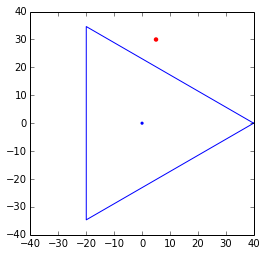

In [5]:
pmt.in_poly(x=5, y=30, n=3, r=40, plot=True)

In [6]:
pmt.in_poly(x=5, y=30, n=3, r=40)  # No graph will be generated, more useful for use within other functions

False

True

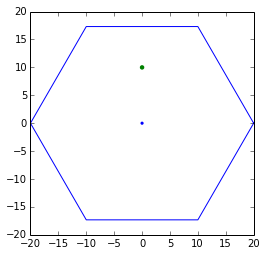

In [7]:
pmt.in_poly(x=0, y=10, n=6, r=20, plot=True)  # Dot changes colour to green when inside the polygon

True

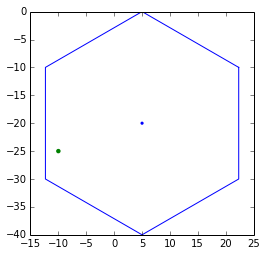

In [8]:
import numpy as np

pmt.in_poly(x=-10, y=-25, n=6, r=20, rotation=np.pi/6, translate=(5,-20), plot=True)  # Rotation and translation

And of course, as n becomes large, the polygon tends to a circle:

True

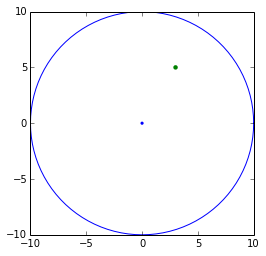

In [9]:
pmt.in_poly(x=3, y=5, n=100, r=10, plot=True)

##Function 2: *plot_circular_fidi_mesh*

In [10]:
print(pmt.plot_circular_fidi_mesh.__doc__)


    Plots a representation of a circular mesh of specified diameter
    comprised of rectangular elements of size x_spacing x y_spacing nm.


    Miscellaneous info:
    ~~~~~~~~~~~~~~~~~~~
    This will set the middle of the mesh to lie at the centre of an 
    element.
    centre_mesh = True
    
    This will set the middle of the mesh to lie at the corner of an 
    element.
    centre_mesh = False
    
    The centering will be decided based on whichever will fit the
    geometry best.
    centre_mesh = 'auto'

    Known bugs:
    ~~~~~~~~~~~

    When the x_spacing OR y_spacing is not a factor of the diameter, 
    the mesh will not be centered correctly.
    
    It is recommended that centre_mesh be set to True in this case.
    


Only has one default argument:

- diameter, the diameter of the circle you would like to plot

Optional arguments:

- x_spacing, the width of the mesh elements. Default x_spacing=2
- y_spacing, the height of the mesh elements. Default y_spacing=2 (only integers are currently supported for x- and y-spacing.)
  
- centre_mesh, outlined in the documentation above. Default centre_mesh='auto'
- show_axes, boolean, self-explanatory. Default show_axes=True
- show_title, boolean, self-explanatory. Default show_title=True

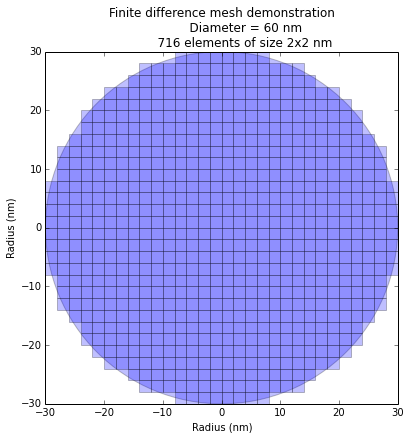

In [11]:
pmt.plot_circular_fidi_mesh(diameter=60)

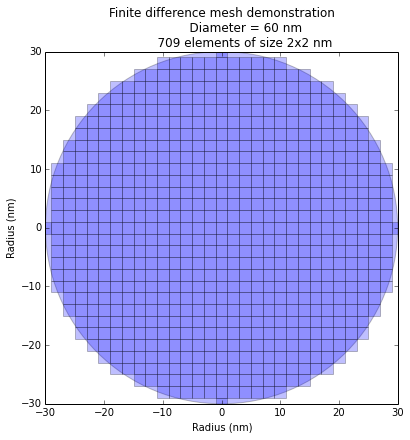

In [12]:
pmt.plot_circular_fidi_mesh(diameter=60, x_spacing=2, y_spacing=2, centre_mesh=True)

#  Note the effect of centre_mesh=True. In the previous plot, the element boundaries are aligned with 0 on the x- and y-axes.
#  In this case, centring the mesh has the effect of producing a mesh that is slightly wider than desired, shown below.

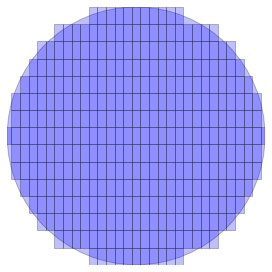

In [13]:
pmt.plot_circular_fidi_mesh(diameter=30, x_spacing=1, y_spacing=2, show_axes=False, show_title=False)

# Flexible element sizes. Toggling axes and title can make for prettier (albeit less informative) pictures.

##Function 3: *plot_poly_fidi_mesh*

In [14]:
print(pmt.plot_poly_fidi_mesh.__doc__)


    Plots a representation of an n-sided polygon mesh with a containing
    circle of specified diameter, comprised of rectangular elements of
    size x_spacing*y_spacing (in nanometres).
    
    
    Miscellaneous info:
    ~~~~~~~~~~~~~~~~~~~
    
    This will set the middle of the mesh to lie at the centre of an
    element.
    centre_mesh = True
    
    This will set the middle of the mesh to lie at the corner of an
    element.
    centre_mesh = False
    
    This will decide True or False based on whichever will best fit the
    geometry.
    centre_mesh = 'auto'
    
    The radius is defined as the circumradius, i.e., the distance from
    the circumcentre of the shape to one of its vertices.
    
    For example, to get a square with an edge length of 50, the
    diameter must be given as 50*(2**0.5), which is the distance from
    the centre of the square to one of its corners.
    


Requires two arguments:

- diameter, the diameter of the [circumscribed circle](https://en.wikipedia.org/wiki/Circumscribed_circle)
- n, the number of sides the polygon should have

Optional arguments:

- x_spacing
- y_spacing
- centre_mesh
- show_axes
- show_title

  (All of the above have the same function as in plot_circular_fidi_mesh, and below, like in_poly)
  

- rotation
- translate

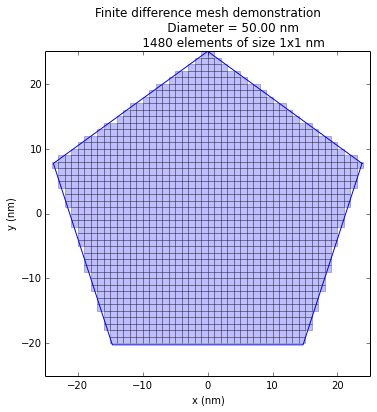

In [15]:
pmt.plot_poly_fidi_mesh(diameter=50, n=5, x_spacing=1, y_spacing=1, rotation=np.pi/10)

##Function 4: *find_circumradius*

In [16]:
print(pmt.find_circumradius.__doc__)


    Returns the radius of the circumscribing circle for a regular
    polygon given the side length or the apothem (distance from
    circumcentre to centre of a face).
    


If you need to specify the side length, or the distance from the circumcentre to the middle of one of the faces, this function will convert that value to the circum**radius** (not diameter!) that would give the correct side length or apothem.

In [17]:
pmt.find_circumradius(n=3, side=10)

5.7735026918962582

Using this in combination with plot_poly_fidi_mesh:

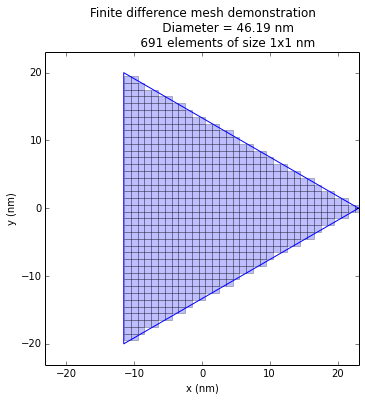

In [18]:
d1 = 2*pmt.find_circumradius(n=3, side=40)

pmt.plot_poly_fidi_mesh(diameter=d1, n=3, x_spacing=1, y_spacing=1)

# It can be seen on the y-axis that the side has a length of 40, as desired.

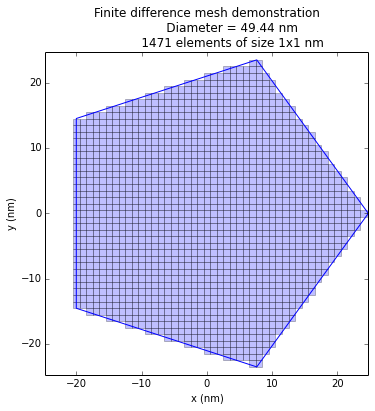

In [19]:
d2 = 2*pmt.find_circumradius(n=5, apothem=20)

pmt.plot_poly_fidi_mesh(diameter=d2, n=5, x_spacing=1, y_spacing=1)

# The circumcentre lies at (0,0), and the leftmost side is in line with x=-20